In [0]:
import os
def install_req():
  !apt-get install -qq curl g++ make
  !curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz
  os.chdir('spatialindex-src-1.8.5')
  !./configure
  !make
  !make install
  
  
  !pip install geopandas shapely descartes rtree
  os.chdir('..')

In [4]:
#!pip uninstall geopandas rtree
install_req()
!ldconfig

Uninstalling geopandas-0.5.0:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/geopandas-0.5.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/geopandas/*
Proceed (y/n)? y
  Successfully uninstalled geopandas-0.5.0
Uninstalling Rtree-0.8.3:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/Rtree-0.8.3.dist-info/*
    /usr/local/lib/python3.6/dist-packages/rtree/*
Proceed (y/n)? y
  Successfully uninstalled Rtree-0.8.3
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  556k  100  556k    0     0   730k      0 --:--:-- --:--:-- --:--:--  729k
checking build system type... x86_64-unknown-linux-gnu
checking for g++... g++
checking whether the C++ compiler works... yes
checking for C++ compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
che

In [7]:
  from rtree import index
  from rtree.index import Rtree
  p = index.Property()
  idx = index.Index(properties=p)
  idx

In [0]:
!pip install geopandas

In [0]:
import geopandas as gpd
import numpy as np
import pandas as pd
from shapely.geometry import Point
import shapely
import missingno as msn
import seaborn as sns
import matplotlib.pyplot as plt

% matplotlib inline

In [0]:
# upload datasets ferry data and By Law Shapefiles  ais_ferry.csv and ByLaw_Areas.shp
#ref: http://catalogue-hrm.opendata.arcgis.com/datasets/49c60d5b9e9847a8a7e815f15c65ec44_0?geometry=-63.756%2C44.612%2C-62.883%2C44.698

In [0]:
df=pd.read_csv('ais_ferry.csv')
gdf = gpd.GeoDataFrame(df.drop(['x', 'y'], axis=1),
crs={'init': 'epsg:4326'},
geometry=[shapely.geometry.Point(xy) for xy in zip(df.x, df.y)])

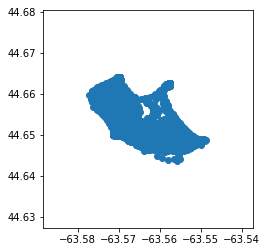

In [11]:
gdf.plot()

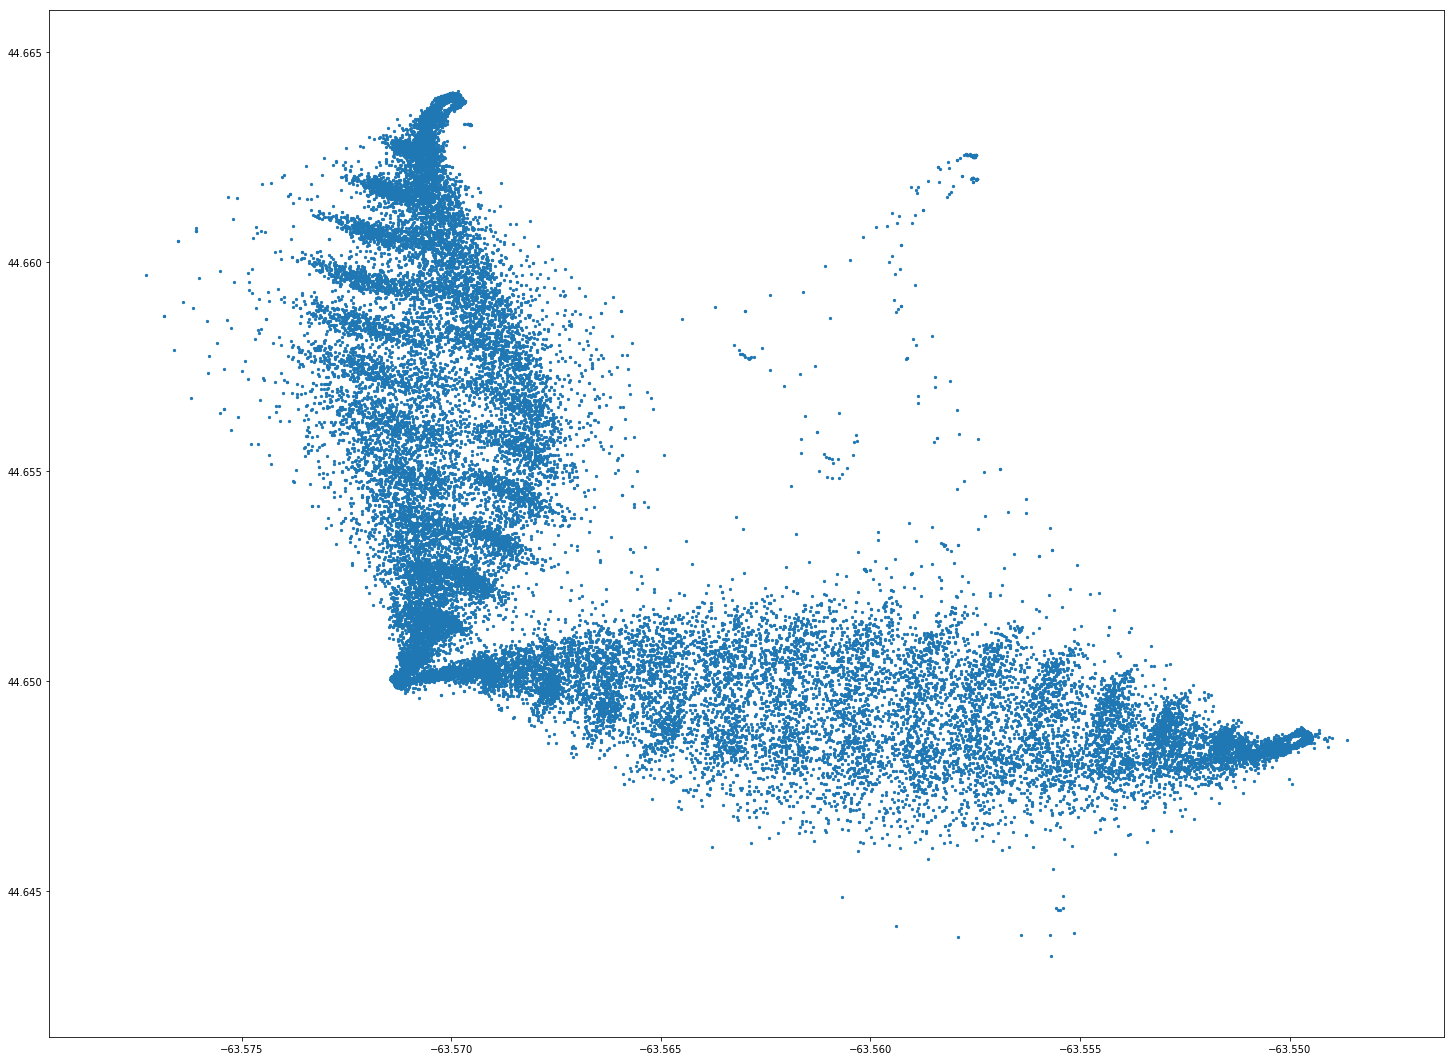

In [12]:
ax=gdf.plot(figsize=(25,25),markersize=5)

In [13]:
halifax=gpd.read_file('ByLaw_Areas.shp')
print(halifax)
bylaw=halifax.set_index(['BYLAW_NAME'])


    OBJECTID  ...                                           geometry
0          1  ...  POLYGON ((-63.6577278426447 44.6273947621158, ...
1          2  ...  POLYGON ((-63.5858463217809 44.6640196293993, ...
2          3  ...  POLYGON ((-63.7691831476554 44.6715269900385, ...
3          4  ...  POLYGON ((-63.4817908889232 44.7301615359978, ...
4          5  ...  POLYGON ((-62.4639740853015 45.1426159107631, ...
5          6  ...  POLYGON ((-63.4136439889873 44.7020573213061, ...
6          7  ...  POLYGON ((-63.2464533203328 44.8176690933133, ...
7          8  ...  POLYGON ((-63.6586734883645 44.9100771537462, ...
8          9  ...  POLYGON ((-63.5452886865651 44.6002144162473, ...
9         10  ...  POLYGON ((-63.5736076743501 44.6536313846828, ...
10        11  ...  (POLYGON ((-63.4059532414471 45.0523054281812,...
11        12  ...  POLYGON ((-63.6963522081476 44.7764927657185, ...
12        13  ...  POLYGON ((-63.545361127608 44.7363524131959, -...
13        14  ...  POLYGON ((-63.5

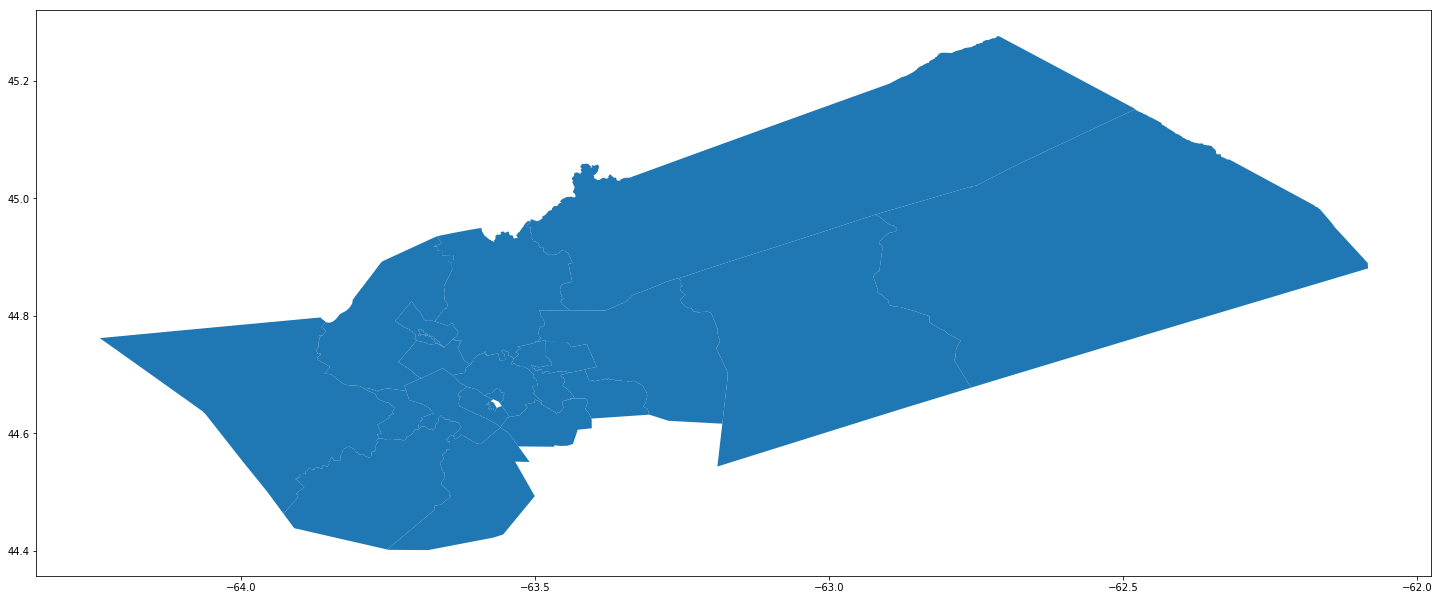

In [14]:
bylaw.plot(figsize=(25,25))

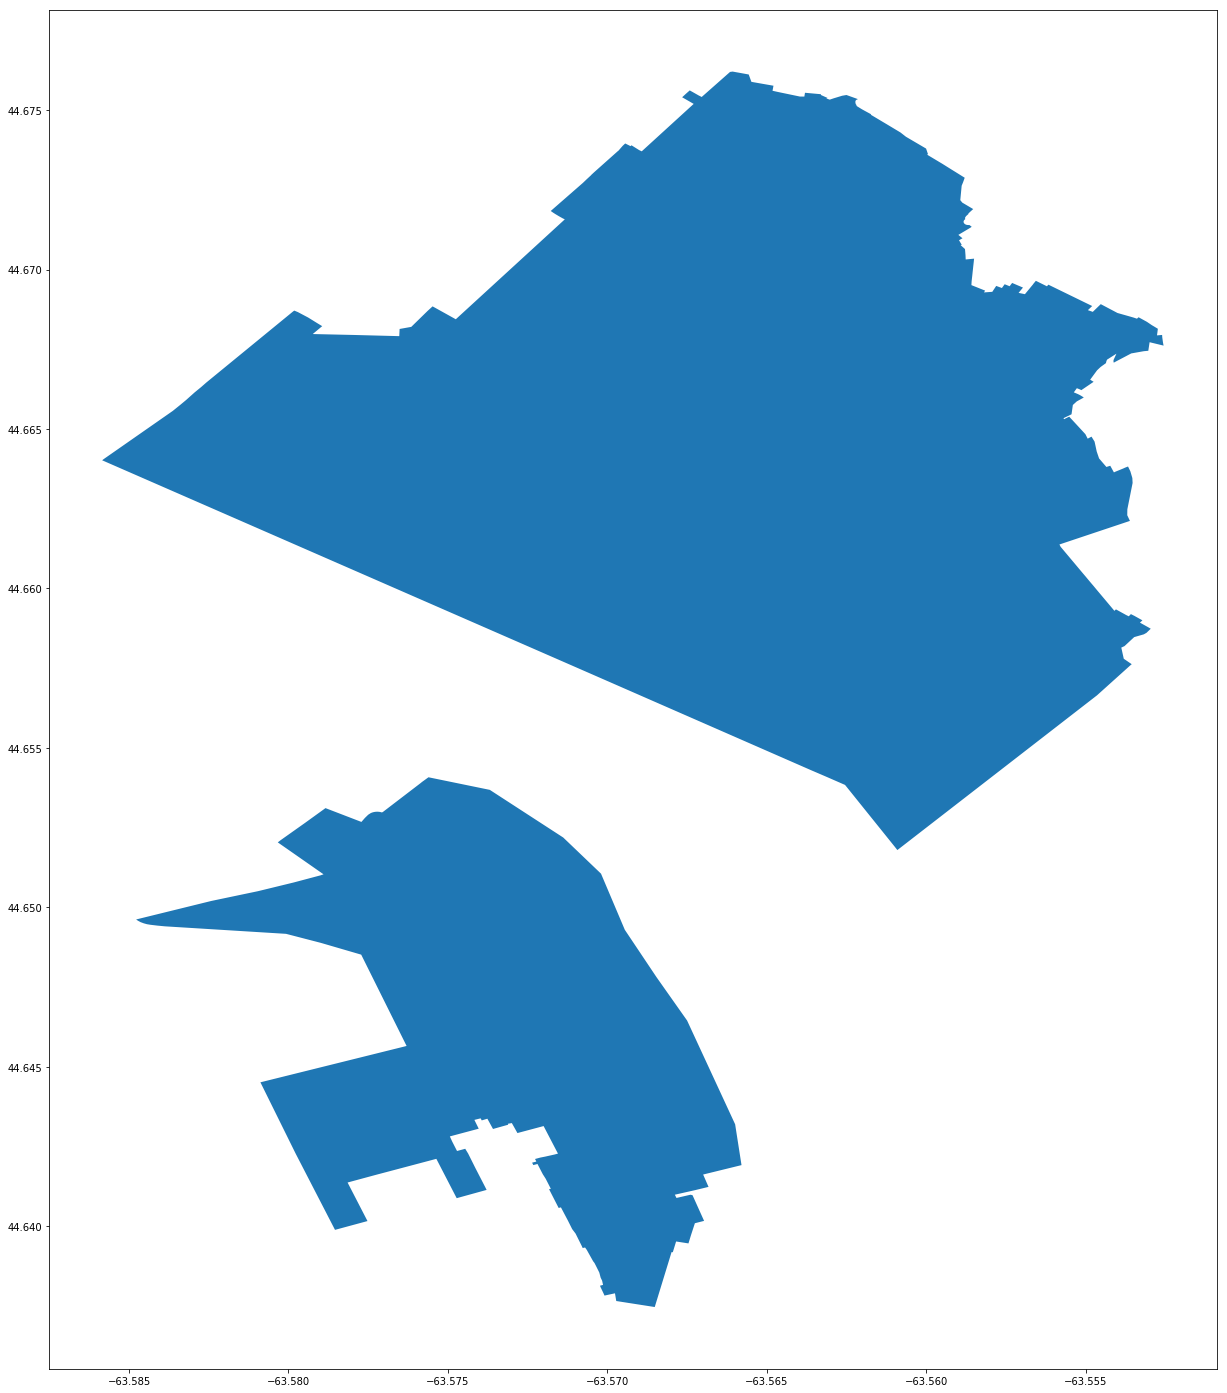

In [0]:
# find halifax 
bylaw.loc[['Downtown Halifax','Downtown Dartmouth'],:].plot(figsize=(25,25))

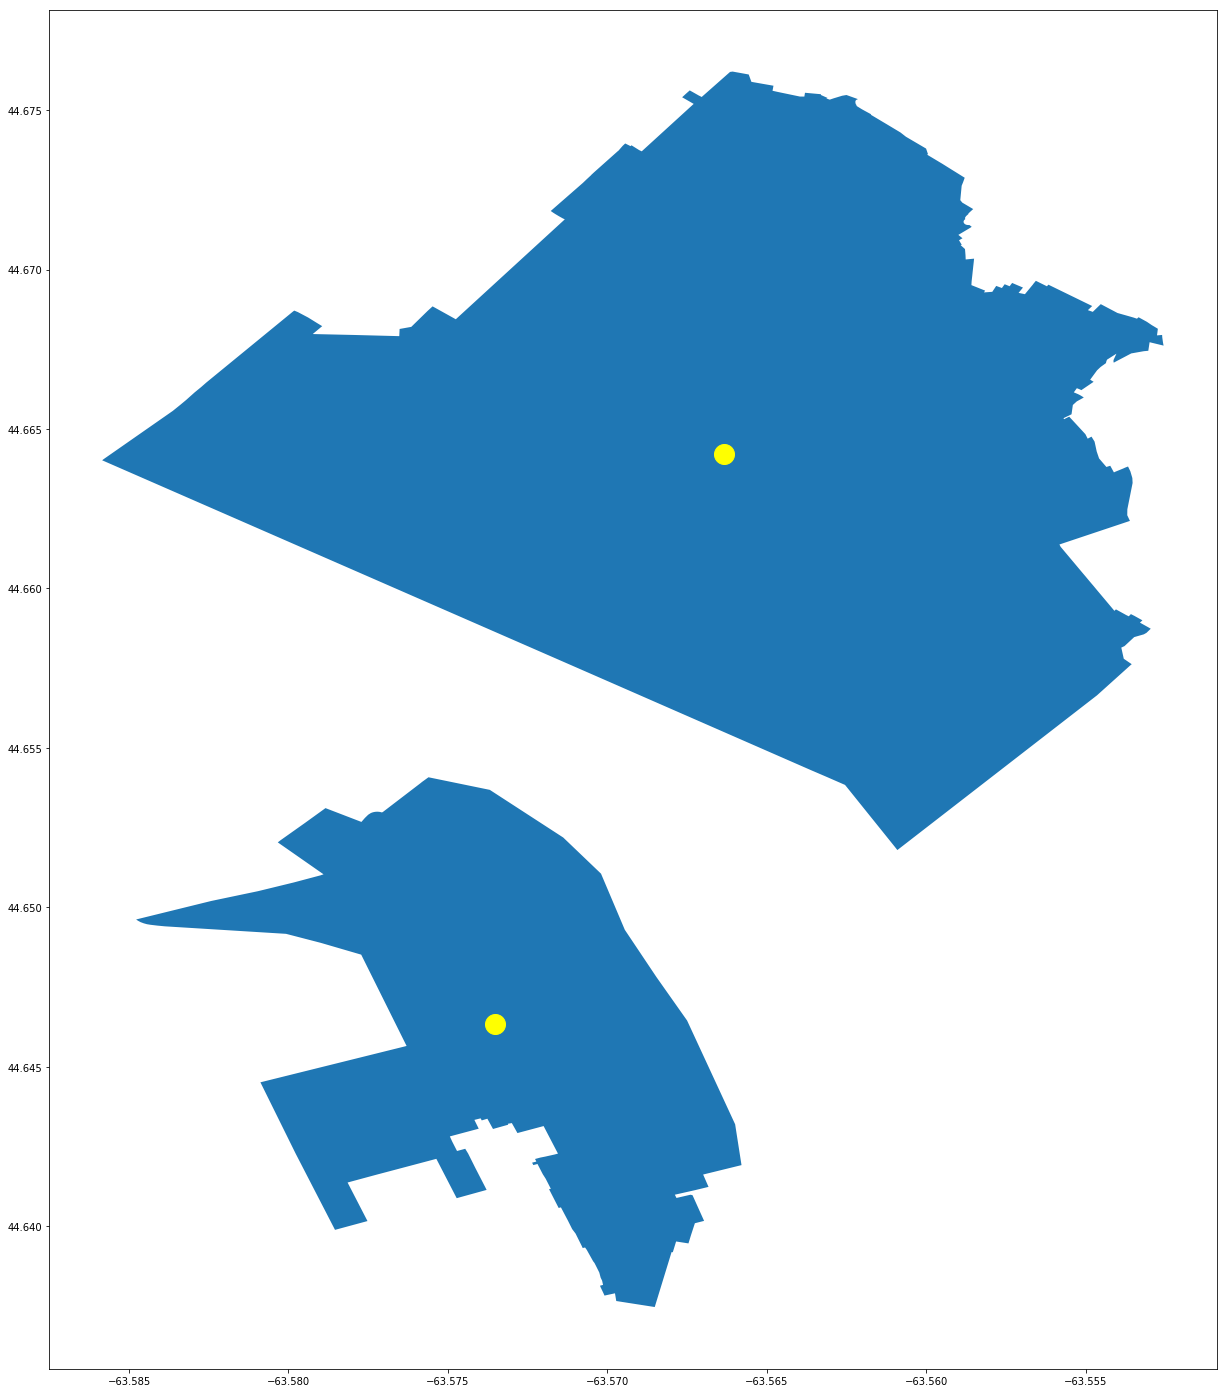

In [0]:
dh=bylaw.loc[['Downtown Halifax'],:].centroid
dd=bylaw.loc[['Downtown Dartmouth'],:].centroid
ax=bylaw.loc[['Downtown Halifax','Downtown Dartmouth'],:].plot(figsize=(25,25))
gpd.GeoSeries([dh[0],dd[0]]).plot(ax=ax,color='yellow',markersize=400)


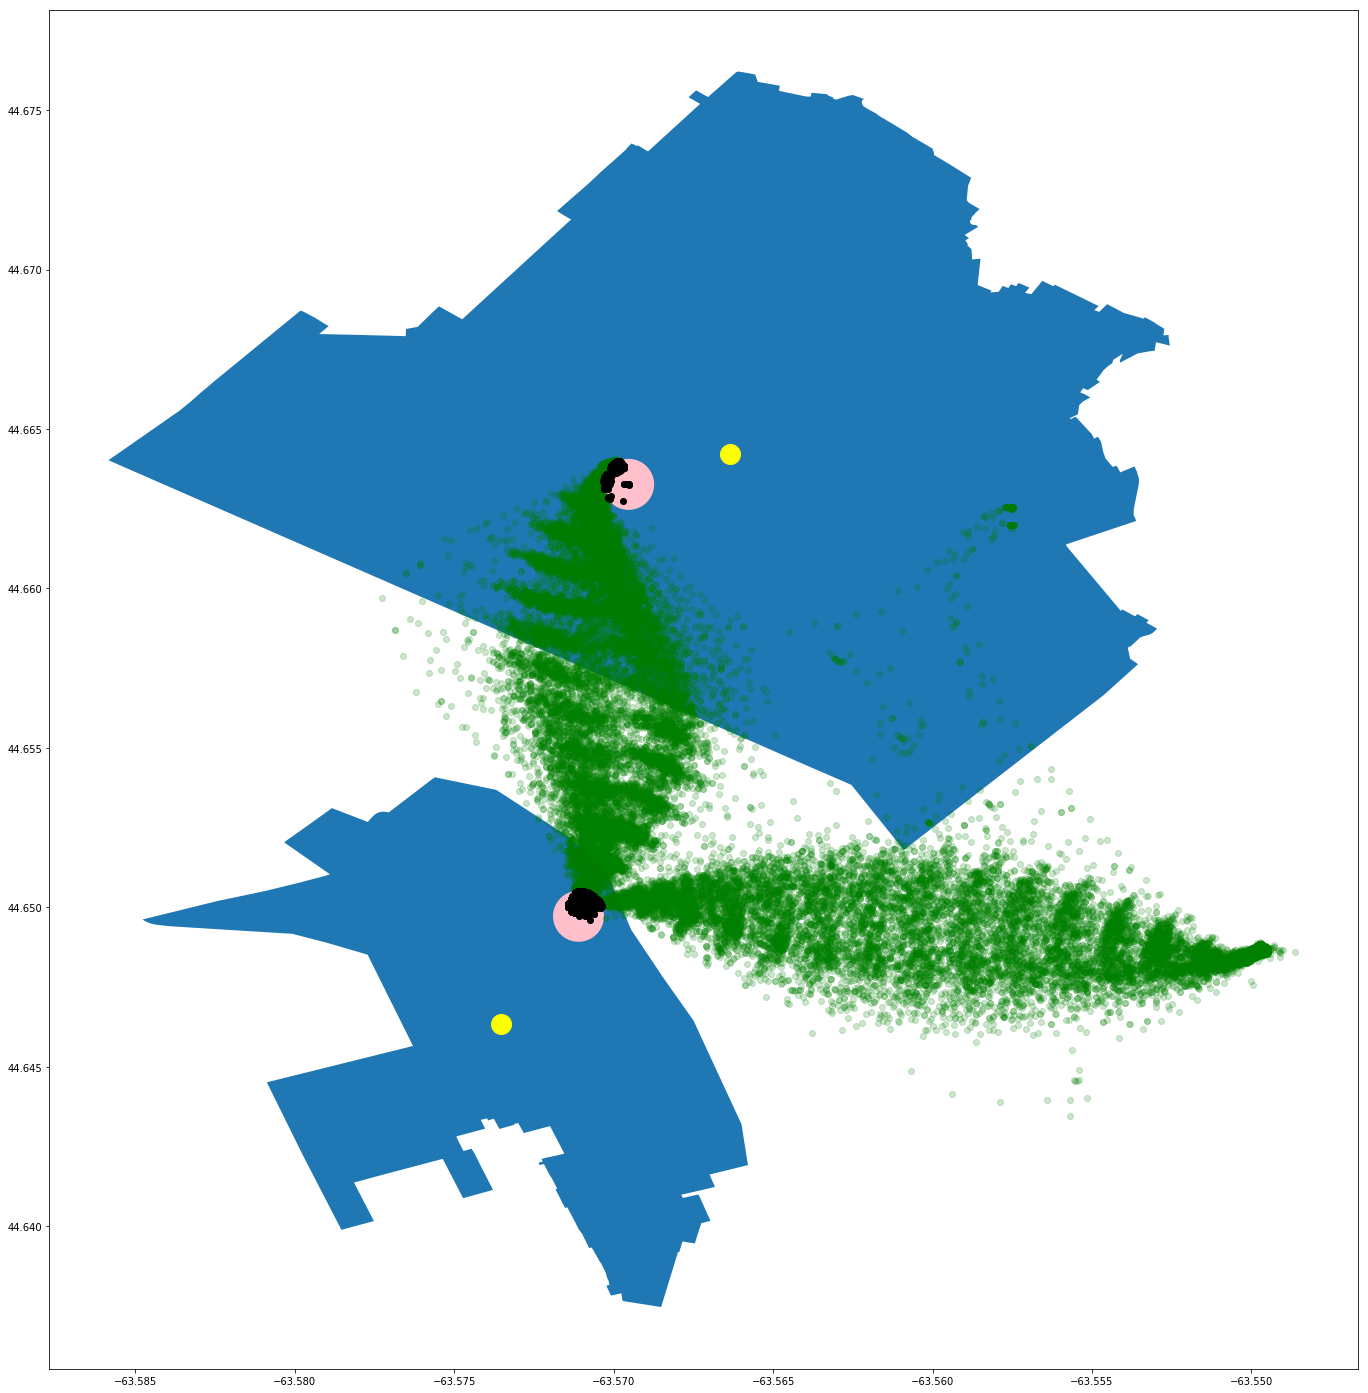

In [0]:
p1=gdf.loc[gdf.distance(dh[0])==gdf.distance(dh[0]).min(),:]
p2=gdf.loc[gdf.distance(dd[0])==gdf.distance(dd[0]).min(),:]

ax=bylaw.loc[['Downtown Halifax','Downtown Dartmouth'],:].plot(figsize=(25,25))
gpd.GeoSeries([dh[0],dd[0]]).plot(ax=ax,color='yellow',markersize=400)
p1=p1.iloc[0,:].geometry.buffer(0.0008) #DH
p2=p2.iloc[0,:].geometry.buffer(0.0008) #DD
gpd.GeoSeries([p1,p2]).plot(ax=ax,color='pink',markersize=400)
gdf.plot(ax=ax,color='g',alpha=0.2)
gdf.loc[gdf.within(p1),:].plot(ax=ax,color='k')
gdf.loc[gdf.within(p2),:].plot(ax=ax,color='k')

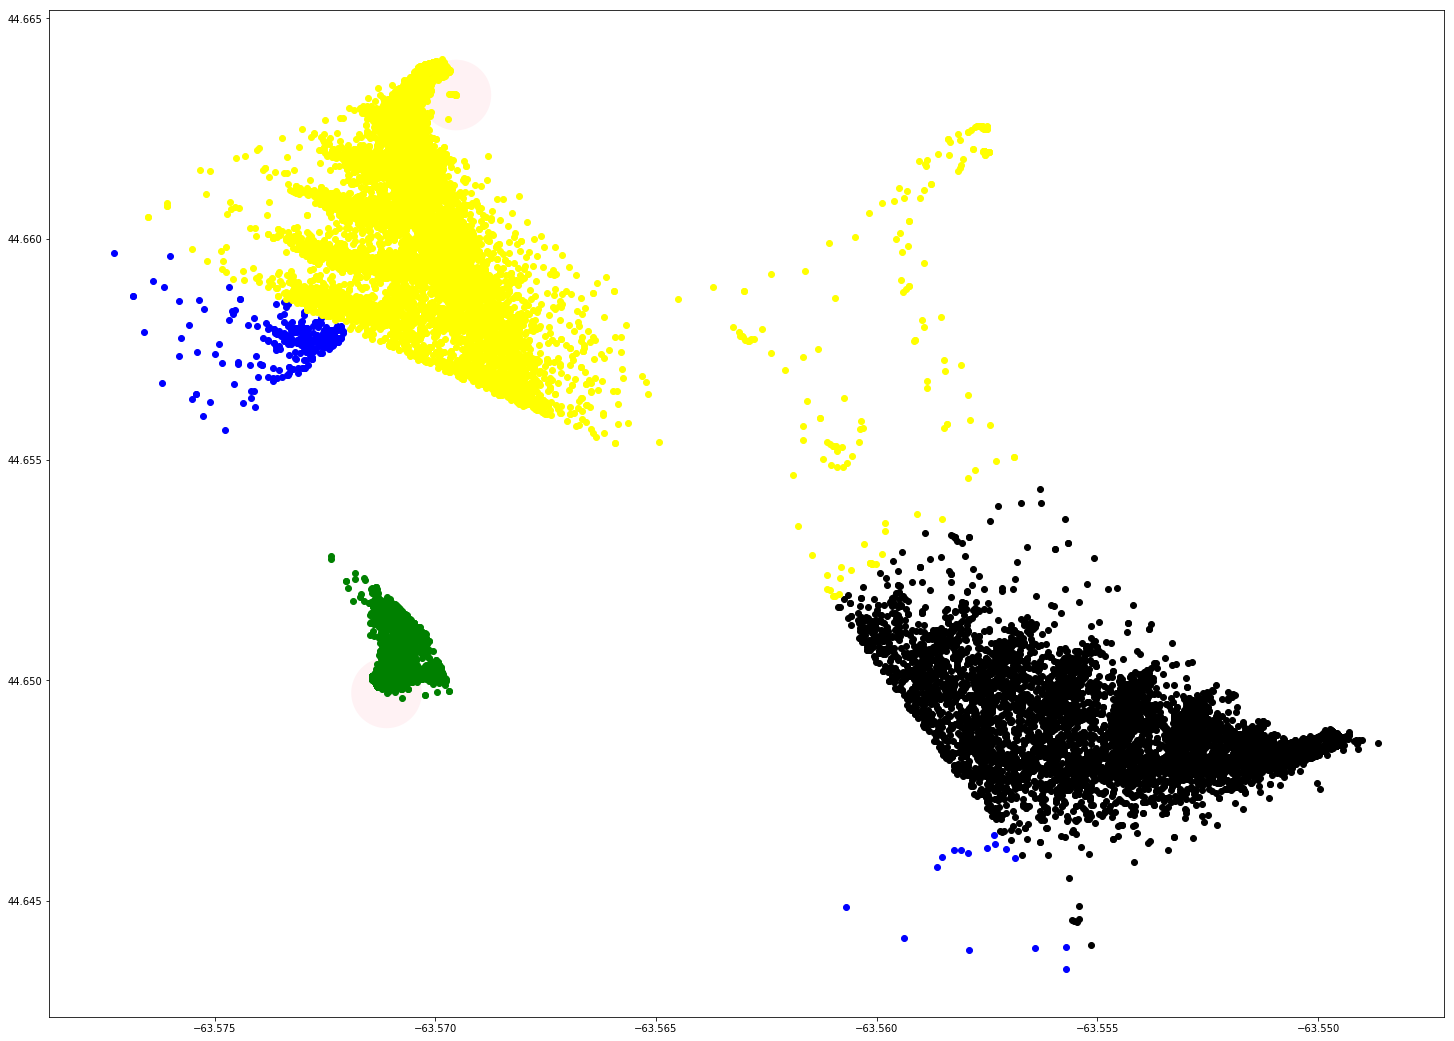

In [0]:
joinres=gpd.sjoin(gdf,bylaw,op='within',how='left')
col=['r','b','g','k','yellow']
i=0
ax=gpd.GeoSeries([p1,p2]).plot(color='pink',markersize=400,figsize=(25,25),alpha=0.2)


for g in set(joinres['index_right']):
  tmp=joinres.loc[joinres['index_right']==g,:]
  if tmp.shape[0]>0:
    tmp.plot(ax=ax,color=col[i])
  i=i+1
  

In [0]:

bylaw

,OBJECTID,BYLAW_ID,BYLAW_CDE,ALIAS,FCODE,SOURCE,SACC,SDATE,WEBURL,GLOBALID,AREA,LEN,Shape__Are,Shape__Len,geometry
BYLAW_NAME,,,,,,,,,,,,,,,
Planning District 4,1,16,PROS,Prospect Road,DLBNPLBA,CASE 01213,Interactive,2011-10-08T00:00:00.000Z,https://www.halifax.ca/index.php/about-halifax...,9131b4ea-18a0-49de-adde-ecc215baa1e5,6.603288e+08,136531.486323,6.603288e+08,136531.486323,"POLYGON ((-63.6577278426447 44.6273947621158, ..."
Halifax Peninsula,2,10,HPEN,None,DLBNPLBA,ZONING,Interactive,2006-07-06T00:00:00.000Z,https://www.halifax.ca/index.php/about-halifax...,e42e83a9-7987-4d7d-a6d9-b3c66093d40e,4.719988e+07,39432.284453,4.719988e+07,39432.284453,"POLYGON ((-63.5858463217809 44.6640196293993, ..."
Timberlea/Lakeside/Beechville,3,21,TLB,None,DLBNPLBA,CASE 01332,Interactive,2010-04-17T00:00:00.000Z,https://www.halifax.ca/index.php/about-halifax...,00a3f0b8-4df0-4f7b-87ad-06dda668044a,8.736646e+07,52737.637597,8.736646e+07,52737.637597,"POLYGON ((-63.7691831476554 44.6715269900385, ..."
Cole Harbour/Westphal,4,3,CHW,None,DLBNPLBA,PLANNING,Interactive,2001-12-13T00:00:00.000Z,https://www.halifax.ca/about-halifax/regional-...,cf7fe0a5-1e13-4a51-8434-4f5fead6cd82,9.313139e+07,75452.919707,9.313139e+07,75452.919707,"POLYGON ((-63.4817908889232 44.7301615359978, ..."
Eastern Shore (East),5,7,ESE,None,DLBNPLBA,PLANNING,Interactive,2001-12-13T00:00:00.000Z,https://www.halifax.ca/index.php/about-halifax...,4c7c3149-3cb0-463c-97ae-0ed732dfc2b6,3.865700e+09,264957.330780,3.865700e+09,264957.330780,"POLYGON ((-62.4639740853015 45.1426159107631, ..."
Lawrencetown,6,13,LTWN,None,DLBNPLBA,PLANNING,Interactive,2001-12-13T00:00:00.000Z,https://www.halifax.ca/index.php/about-halifax...,7e487385-d6cf-493a-ac6a-08f6eba7f651,1.337283e+08,56387.258266,1.337283e+08,56387.258266,"POLYGON ((-63.4136439889873 44.7020573213061, ..."
Planning Districts 8 & 9,7,12,LEPL,Porters Lake,DLBNPLBA,PLANNING,Interactive,2001-12-13T00:00:00.000Z,https://www.halifax.ca/index.php/about-halifax...,e0b200b8-ec28-43eb-b887-3c7bcc8ccf2d,7.712319e+08,144723.262589,7.712319e+08,144723.262589,"POLYGON ((-63.2464533203328 44.8176690933133, ..."
"Beaver Bank, Hammonds Plains and Upper Sackville",8,11,HPSBB,Hammonds Plains,DLBNPLBA,PLANNING,Interactive,2001-12-13T00:00:00.000Z,https://www.halifax.ca/about-halifax/regional-...,9cca34ff-636e-4745-b3ec-f484f67efb04,5.696235e+08,139292.644676,5.696235e+08,139292.644676,"POLYGON ((-63.6586734883645 44.9100771537462, ..."
Planning District 5,9,2,CHEB,Chebucto Peninsula,DLBNPLBA,PLANNING,Interactive,2001-12-13T00:00:00.000Z,https://www.halifax.ca/about-halifax/regional-...,c880bec6-4764-4f21-b639-ee80bdf14d22,4.657270e+08,111251.677876,4.657270e+08,111251.677876,"POLYGON ((-63.5452886865651 44.6002144162473, ..."


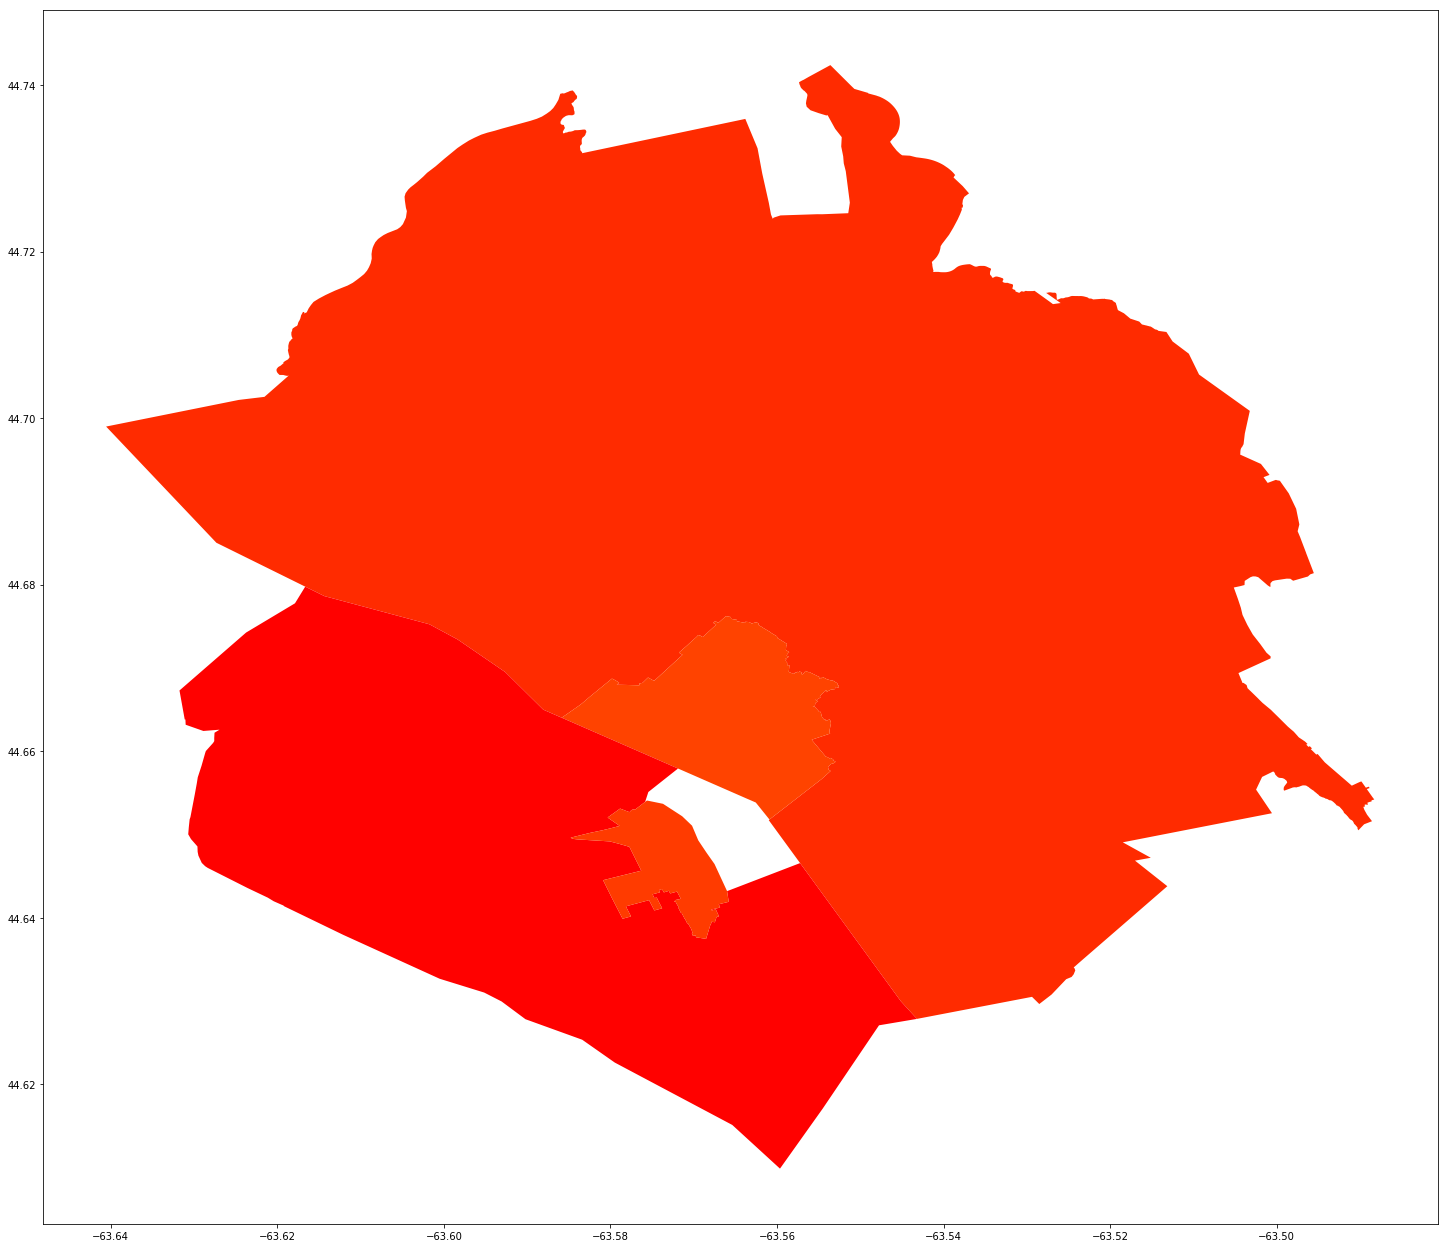

In [0]:


import matplotlib.cm as cm
from matplotlib.colors import Normalize

cmap = cm.autumn
norm = Normalize(vmin=0, vmax=gdf.shape[0])


ax=gpd.GeoSeries([p1,p2]).plot(color='pink',markersize=400,figsize=(25,25),alpha=0.2)
for g in set(bylaw.index.values):
  area=bylaw.loc[bylaw.index==g,:]
  aa=area.geometry[0]
  r=gdf.loc[gdf.within(aa),:]
  c=r.shape[0]
  if c>0:
    e=c*1.0/gdf.shape[0]
    area.plot(ax=ax,color = cmap(norm(c)))
    #print(g,c,e)

In [0]:
cm.